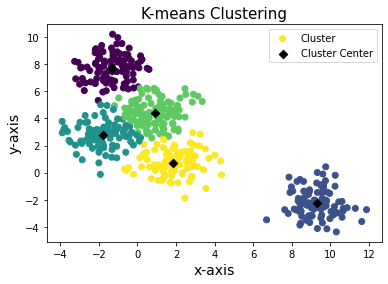

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_clusters = 5

def load_dataset(n_samples: int, n_clusters: int):
    """
    This function generates sample data with the given number of samples and clusters
    :param n_samples: number of samples to be generated
    :param n_clusters: number of clusters to be used in the generated data
    :return: generated data (X, y)
    """

    # Generate sample data
    X, y = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=0)
    
    return X, y


# Load the dataset
X, y = load_dataset(500, n_clusters)

def kmeans_clustering(X, n_clusters):
    """
    This function performs k-means clustering on the given dataset with a specified number of clusters
    :param X: dataset on which k-means clustering should be performed
    :param n_clusters: number of clusters to be used in k-means clustering
    :return: k-means model object
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    return kmeans

# Perform k-means clustering
kmeans = kmeans_clustering(X, n_clusters)

def plot_kmeans_clusters(X, kmeans, x_label, y_label, title):
    """
    This function plots the k-means clustering results on a scatter plot
    :param X: dataset on which k-means clustering has been performed
    :param kmeans: k-means model object
    :param x_label: label for x-axis
    :param y_label: label for y-axis
    :param title: title for the plot
    """
    # Plot the data points with cluster assignments
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

    # Plot the cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='D', color='black')

    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.title(title, fontsize=15)
    plt.legend(['Cluster', 'Cluster Center'])
    plt.show()

# Plot the k-means clustering results
plot_kmeans_clusters(X, kmeans, 'x-axis', 'y-axis', 'K-means Clustering')


Mean NRP : 
Year              1995.500000
United Kingdom       0.744751
Ireland              0.137900
Netherlands          0.467147
Denmark              0.533003
dtype: float64



NRP 2013 : 
    Year United Kingdom   Ireland Netherlands   Denmark
41  2013       0.650651  0.011127    0.925753  1.035191


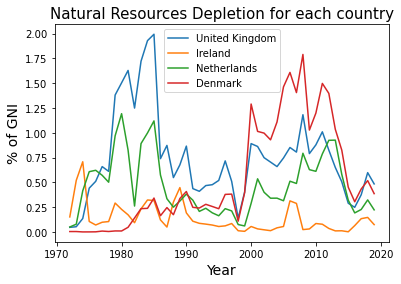

In [7]:
# Comparing between different Countries
def read_worldbank_data(file_path: str):
    """
    This function reads in a file in Worldbank format and returns the original and transposed dataframe
    :param file_path: path of the file to be read
    :return: original dataframe and transposed dataframe
    """
    # read in the data
    original_df = pd.read_csv(file_path)
    
    # store the country names in a list
    country = list(original_df['Country Name'])
    
    # transpose the dataframe
    transposed_df = original_df.transpose()
    
    # update the column names with the country names
    transposed_df.columns = country
    
    # remove unnecessary rows
    transposed_df = transposed_df.iloc[4:]
    transposed_df = transposed_df.iloc[:-1]
    
    # reset index
    transposed_df = transposed_df.reset_index()
    
    # rename the index column
    transposed_df = transposed_df.rename(columns={"index": "Year"})
    
    # convert year column to int
    transposed_df['Year'] = transposed_df['Year'].astype(int)
    
    return original_df, transposed_df

df1, df2 = read_worldbank_data('data 2.csv')


def calculate_nrd_stats(dataframe):
    """
    This function calculates the mean Natural Resources Depletion for a specific year
    :param dataframe: Dataframe containing the Natural Resources Depletion data
    :return: None
    """
    # Calculate the mean Natural Resources Depletion (% of GNI) for each country
    mean_nrp = dataframe.mean()
    print("Mean NRP : ")
    print(mean_nrp)
    print("\n\n")

    # Calculate the Natural Resources Depletion (% of GNI) for each country in 2013
    nrp_2013 = dataframe[dataframe['Year'] == 2013]
    print("NRP 2013 : ")
    print(nrp_2013)

calculate_nrd_stats(df2)

def plot_nrd_over_time(df, countries):
    """
    This function plots the Natural Resources Depletion (% of GNI) for a given list of countries over time
    :param df: dataframe containing Natural Resources Depletion data
    :param countries: list of countries to plot Natural Resources Depletion
    """
    df.plot(x='Year', y=countries)
    plt.title("Natural Resources Depletion for each country", fontsize=15)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("% of GNI", fontsize=14)
    plt.show()


country_name = list(df1['Country Name'])    
plot_nrd_over_time(df2, country_name)


In [6]:
df1['Series Name'][0]

'Adjusted savings: natural resources depletion (% of GNI)'

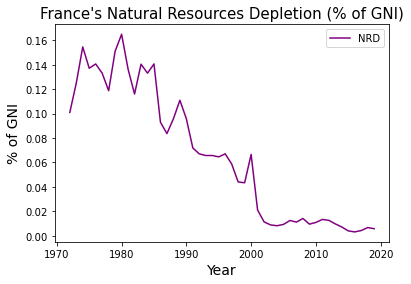

parameters: [ 1.42358990e-01 -1.80330332e-01  1.99350505e+03]
std. dev. [0.00658696 0.0230971  0.93527423]


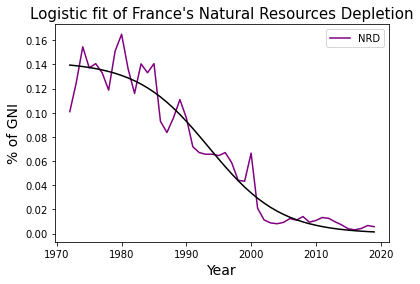

Future Logisitc Values 2021-2030 :
[0.0009932  0.00083027 0.00069394 0.0005799  0.00048454 0.00040482
 0.00033818 0.00028249 0.00023595 0.00019707]
[1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027
 2028 2029 2030]


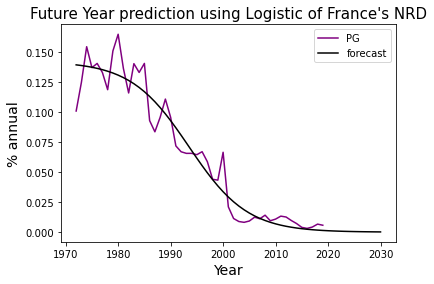

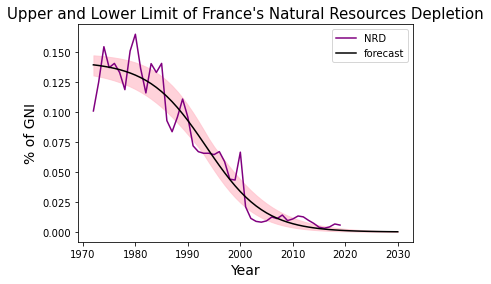

(6.694728886805827e-05, 0.0005536059138927018)


In [18]:


def read_worldbank_data(file_path: str):
    """
    This function reads in a file in Worldbank format and returns the original and transposed dataframe
    :param file_path: path of the file to be read
    :return: original dataframe and transposed dataframe
    """
    # read in the data
    original_df = pd.read_csv(file_path)
    
    # store the country names in a list
    country = list(original_df['Country Name'])
    
    # transpose the dataframe
    transposed_df = original_df.transpose()
    
    # update the column names with the country names
    transposed_df.columns = country
    
    # remove unnecessary rows
    transposed_df = transposed_df.iloc[4:]
    transposed_df = transposed_df.iloc[:-1]
    
    # reset index
    transposed_df = transposed_df.reset_index()
    
    # rename the index column
    transposed_df = transposed_df.rename(columns={"index": "Year"})
    
    # convert year column to int
    transposed_df['Year'] = transposed_df['Year'].astype(int)
    
    return original_df, transposed_df

original_df, transposed_df = read_worldbank_data("data 1.csv")

# store the country names in a list
country = list(original_df['Country Name'])


def plot_natural_resources_depletion(df, country):
    """
    This function plots the Natural Resources Depletion of a given country over time
    :param df: DataFrame containing the Natural Resources Depletion data
    :param country: name of the country for which the Natural Resources Depletion should be plotted
    """
    df.plot("Year", country, color="purple")
    plt.title(f"{country}'s Natural Resources Depletion (% of GNI)", fontsize=15)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("% of GNI", fontsize=14)
    plt.legend(["NRD"])
    plt.show()

plot_natural_resources_depletion(transposed_df, country[0])




def logistic(t, n0, g, t0):
    """
    Calculates the logistic function with scale factor n0 and growth rate g
    :param t: input data
    :param n0: scale factor
    :param g: growth rate
    :param t0: inflection point
    :return: logistic function evaluated at t
    """
    f = n0 / (1 + np.exp(-g*(t - t0)))
    return f


df = transposed_df
param, covar = opt.curve_fit(logistic, df["Year"], df[country].squeeze(), p0=(float(df[country].iloc[0]), 0.03, 2000.0))

sigma = np.sqrt(np.diag(covar))
print("parameters:", param)
print("std. dev.", sigma)

df["fit"] = logistic(df["Year"], *param)


def plot_logistic_fit(df, country):
    """
    Plot a logistic fit of the given country's Natural Resources Depletion
    :param df: DataFrame containing the NRD data
    :param country: string of the country to plot
    """
    df.plot("Year", [country, "fit"], color=["purple", "black"])
    plt.title("Logistic fit of {}'s Natural Resources Depletion".format(country), fontsize=15)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("% of GNI", fontsize=14)
    plt.legend(["NRD"])
    plt.show()

plot_logistic_fit(df, country[0])


future_years = [2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
# generate logistic function values for future years
future_log = logistic(future_years, *param)
# unpack the parameters of the logistic function

# print the future logistic values
print("Future Logisitc Values 2021-2030 :")
print(future_log)


year = np.arange(df['Year'][0], 2031)
print(year)
forecast = logistic(year, *param)

def plot_future_prediction(df, country, forecast, year):
    """
    Plot the future prediction of a country's Natural Resources Depletion using a logistic model
    :param df: DataFrame containing the NRD data
    :param country: string of the country to plot
    :param forecast: forecasted values for the future
    :param year: future year
    """
    plt.plot(df["Year"], df[country], label="PG", color="purple")
    plt.plot(year, forecast, label="forecast", color="black")

    plt.title("Future Year prediction using Logistic of {}'s NRD".format(country), fontsize=15)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("% annual", fontsize=14)
    plt.legend(["PG"])
    plt.legend()
    plt.show()

plot_future_prediction(df, country[0], forecast, year)


df2 = pd.DataFrame({'Future Year': future_years, 'Logistic':future_log})
df2


def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   



low, up = err_ranges(year, logistic, param, sigma)

def plot_prediction_limits(df, country, forecast, year, low, up):
    """
    Plot the future prediction of a country's Natural Resources Depletion using a logistic model along with lower and upper limits
    :param df: DataFrame containing the NRD data
    :param country: string of the country to plot
    :param forecast: forecasted values for the future
    :param year: future year
    :param low: lower limits for the forecast
    :param up: upper limits for the forecast
    """
    plt.figure()
    plt.plot(df["Year"], df[country], label="NRD", color="purple")
    plt.plot(year, forecast, label="forecast", color="black")

    plt.fill_between(year, low, up, color="pink", alpha=0.7)
    plt.title("Upper and Lower Limit of {}'s Natural Resources Depletion".format(country), fontsize=15)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("% of GNI", fontsize=14)
    plt.legend()
    plt.show()

plot_prediction_limits(df, country[0], forecast, year, low, up)


print(err_ranges(2030, logistic, param, sigma))
